In [11]:
import pandas as pd
import numpy as np
import os
import time,datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [12]:
#Import Data
new_col = ['Date', 'Pudong_Bank', 'Zhengjia_Longsheng', 'Shanghai_Composite', 'China_GovernmentDebt']
data = pd.read_csv('data.csv', names = new_col, header = 0)
data.head()

,Date,Pudong_Bank,Zhengjia_Longsheng,Shanghai_Composite,China_GovernmentDebt
0,2016-04,10.885924,8.557091,2938.324,155.3971
1,2016-05,11.166772,7.953706,2916.616,155.6835
2,2016-06,10.763558,8.012793,2929.606,156.0090
3,2016-07,10.853427,8.858691,2979.339,156.6333
4,2016-08,11.392642,9.016716,3085.491,157.2316


In [13]:
#Monthly Rate of Return
ret = pd.DataFrame(columns = ['Date', 'Pudong_Bank', 'Zhengjia_Longsheng', 'Shanghai_Composite', 'China_GovernmentDebt'])
ret.iloc[:,0] = data.iloc[1:,0]
for i in range(0, data.shape[0]-1):
    for j in range(1, data.shape[1]):
        ret.iloc[i,j] = (data.iloc[i+1,j]/data.iloc[i,j]-1)*100
ret.head()

,Date,Pudong_Bank,Zhengjia_Longsheng,Shanghai_Composite,China_GovernmentDebt
1,2016-05,2.57992,-7.05128,-0.738789,0.184302
2,2016-06,-3.61084,0.742885,0.445379,0.209078
3,2016-07,0.834939,10.5568,1.6976,0.400169
4,2016-08,4.96815,1.78384,3.56294,0.381975
5,2016-09,0.0606796,-5.15464,-2.61832,0.215097


In [14]:
#Cumulative Rate of Return
def log_ret(x): 
    test=x.map(lambda x: np.log(1+x/100))
    return (np.exp(test.sum())-1)
def get_cum_ret(ret):
    cum_ret = ret.copy()
    for i in range(ret.shape[0]):
        for j in range(ret.shape[1]-1):
            cum_ret.iloc[i,j+1] = log_ret(ret.iloc[:i+1,j+1])*100
    return cum_ret
cum_ret = get_cum_ret(ret)
cum_ret.head()

,Date,Pudong_Bank,Zhengjia_Longsheng,Shanghai_Composite,China_GovernmentDebt
1,2016-05,2.57992,-7.05128,-0.738789,0.184302
2,2016-06,-1.12408,-6.36078,-0.2967,0.393765
3,2016-07,-0.298521,3.52457,1.39586,0.79551
4,2016-08,4.6548,5.37128,5.00854,1.18052
5,2016-09,4.7183,-0.0602293,2.25908,1.39816


In [15]:
#Solve the error of “Font family ['sans-serif'] not found.Falling back to DejaVu Sans.”：

import matplotlib
print(matplotlib.matplotlib_fname())

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [16]:
matplotlib.get_cachedir()

'/Users/wangzihui/.matplotlib'

In [17]:
rm -rf /Users/wangzihui/.matplotlib

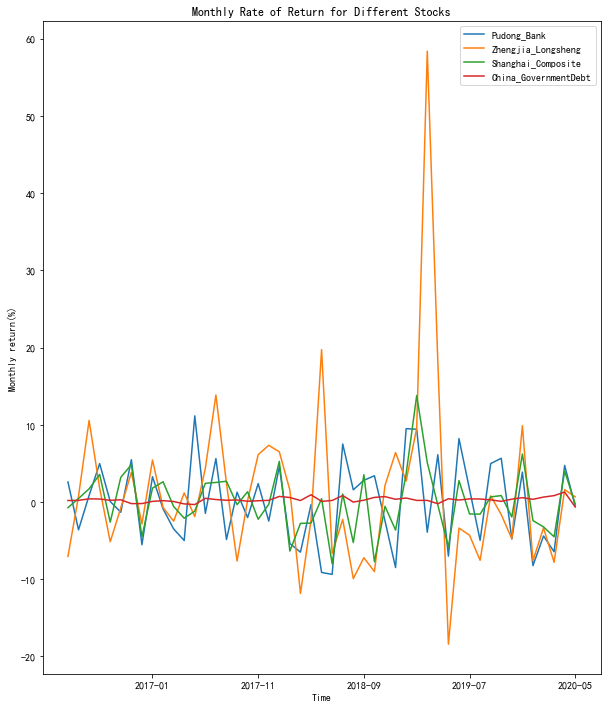

In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,12))
plt.title('Monthly Rate of Return for Different Stocks')
plt.ylabel('Monthly return(%)')
plt.xlabel('Time')
x = ret.iloc[:,0]
plt.plot(x, ret.iloc[:,1], label = 'Pudong_Bank')
plt.plot(x, ret.iloc[:,2], label = 'Zhengjia_Longsheng')
plt.plot(x, ret.iloc[:,3], label = 'Shanghai_Composite')
plt.plot(x, ret.iloc[:,4], label = 'China_GovernmentDebt')
plt.xticks(['2017-01','2017-11','2018-09','2019-07','2020-05'])
plt.legend()
plt.show()

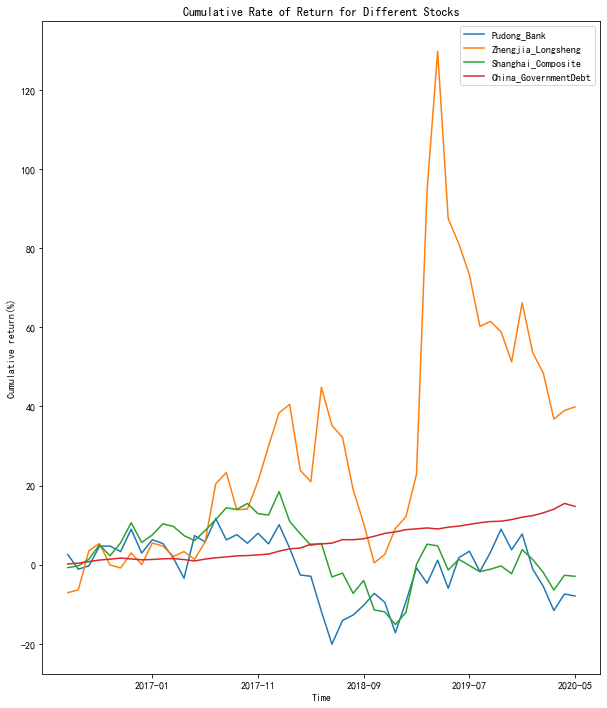

In [19]:
plt.figure(figsize=(10,12))
plt.title('Cumulative Rate of Return for Different Stocks')
plt.ylabel('Cumulative return(%)')
plt.xlabel('Time')
plt.plot(cum_ret.iloc[:,0], cum_ret.iloc[:,1], label = 'Pudong_Bank')
plt.plot(cum_ret.iloc[:,0], cum_ret.iloc[:,2], label = 'Zhengjia_Longsheng')
plt.plot(cum_ret.iloc[:,0], cum_ret.iloc[:,3], label = 'Shanghai_Composite')
plt.plot(cum_ret.iloc[:,0], cum_ret.iloc[:,4], label = 'China_GovernmentDebt')
plt.xticks(['2017-01','2017-11','2018-09','2019-07','2020-05'])
plt.legend()
plt.show()

In [21]:
def get_cov(ret):
    data = ret.iloc[:,[1,2]]/100
    output = pd.DataFrame()
    output['Mean'] = data.mean()
    output['Variance'] = data.var()
    output['Standard Deviation'] = data.std()
    covxy = np.cov(data.iloc[:,0].astype(float), data.iloc[:,1].astype(float))
    coefxy = np.corrcoef(data.iloc[:,0].astype(float),data.iloc[:,1].astype(float))
    output['Covariance'] = [np.NaN,covxy[0,1]]
    output['Correlation Coefficient'] = [np.NaN,coefxy[0,1]]
    return output
output = get_cov(ret)
print(output)

                        Mean  Variance  Standard Deviation  Covariance  \
Pudong_Bank        -0.000258  0.002911            0.053952         NaN   
Zhengjia_Longsheng  0.012044  0.012448            0.111569    0.000503   

                    Correlation Coefficient  
Pudong_Bank                             NaN  
Zhengjia_Longsheng                 0.083521  


<ipython-input-22-46d3a88e4fc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Constant Term'] = 1
<ipython-input-22-46d3a88e4fc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Market Excess Return'] = ret.iloc[:,3]-ret.iloc[:,4]  #Shanghai_Composite-China_GovernmentDebt


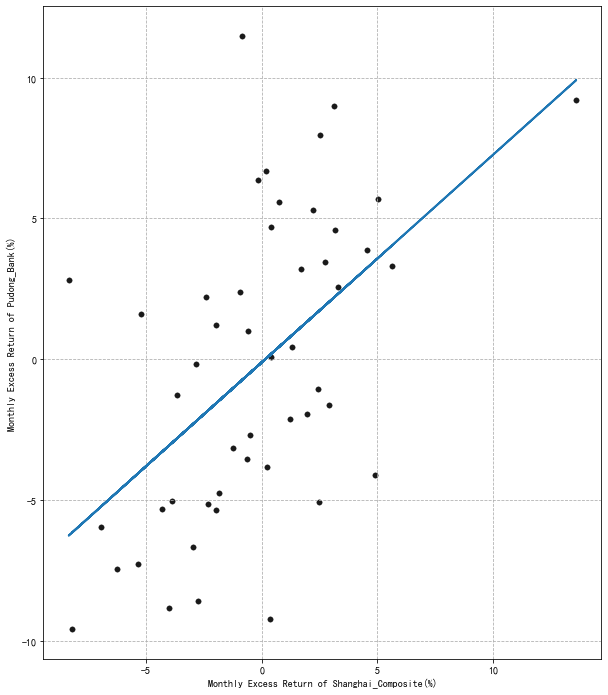

In [22]:
x = ret.iloc[:,[3,4]]
x.columns = ['Constant Term','Market Excess Return']
x['Constant Term'] = 1
x['Market Excess Return'] = ret.iloc[:,3]-ret.iloc[:,4]  #Shanghai_Composite-China_GovernmentDebt
y1 = ret.iloc[:,1]-ret.iloc[:,4]  #Pudong_Bank-China_GovernmentDebt

plt.figure(figsize=(10,12))
plt.scatter(x.iloc[:,1],y1,s = 30, c = 'black', marker = 'o', alpha = 0.9, linewidths = 0.3, label = 'ScatterPlot')
reg1 = LinearRegression().fit(x, y1)
pred1 = reg1.predict(x)
plt.plot(x.iloc[:,1], pred1, linewidth = 2,label = 'Pudong_Bank')
plt.grid(ls='--')
plt.xlabel('Monthly Excess Return of Shanghai_Composite(%)')
plt.ylabel('Monthly Excess Return of Pudong_Bank(%)')
plt.show()

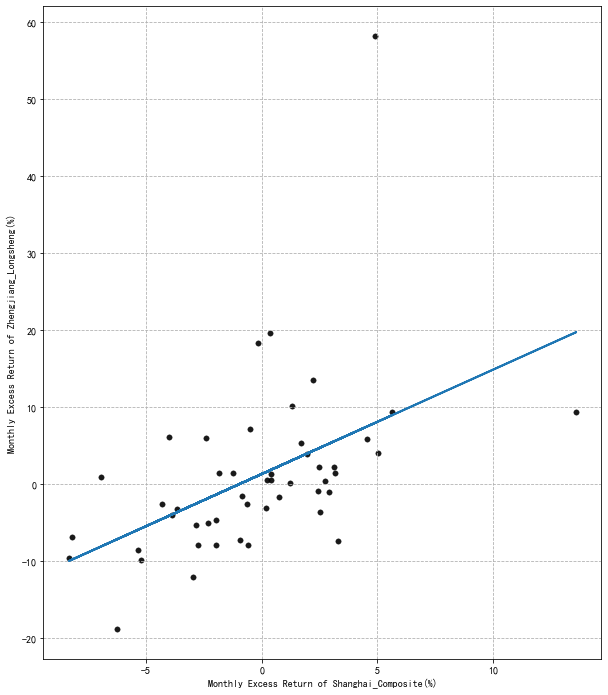

In [23]:
y2 = ret.iloc[:,2]-ret.iloc[:,4]  #Zhengjiang_Longsheng-China_GovernmentDebt

plt.figure(figsize=(10,12))
plt.scatter(x.iloc[:,1],y2,s = 30, c = 'black', marker = 'o', alpha = 0.9, linewidths = 0.3, label = 'ScatterPlot')
reg2 = LinearRegression().fit(x, y2)
pred2 = reg2.predict(x)
plt.plot(x.iloc[:,1], pred2, linewidth = 2,label = 'Zhengjiang_Longsheng')
plt.grid(ls='--')
plt.xlabel('Monthly Excess Return of Shanghai_Composite(%)')
plt.ylabel('Monthly Excess Return of Zhengjiang_Longsheng(%)')
plt.show()

In [24]:
def get_OLS1(ret):
    x = (ret.iloc[:,3].astype(float)-ret.iloc[:,4].astype(float))/100  #Shanghai_Composite-China_GovernmentDebt
    y1 = (ret.iloc[:,1].astype(float)-ret.iloc[:,4].astype(float))/100  #Pudong_Bank-China_GovernmentDebt
    X=sm.add_constant(x)
    model1 = sm.OLS(y1,X)
    model1 = model1.fit()
    return model1
model1 = get_OLS1(ret)
model1.summary()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     19.51
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           5.85e-05
Time:                        20:48:28   Log-Likelihood:                 82.443
No. Observations:                  49   AIC:                            -160.9
Df Residuals:                      47   BIC:                            -157.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.007     -0.169      0.866      -0.014       0.012
0              0.7372      0.167      4.417      0.000       0.401       1.073
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   2.504
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.280
Skew:                           0.389   Prob(JB):                        0.527
Kurtosis:                       2.852   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
def get_OLS2(ret):
    x = (ret.iloc[:,3].astype(float)-ret.iloc[:,4].astype(float))/100  #Shanghai_Composite-China_GovernmentDebt
    y2 = (ret.iloc[:,2].astype(float)-ret.iloc[:,4].astype(float))/100  #Zhengjiang_Longsheng-China_GovernmentDebt
    X=sm.add_constant(x)
    model2 = sm.OLS(y2,X)
    model2 = model2.fit()
    return model2
model2 = get_OLS2(ret)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     14.13
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           0.000472
Time:                        20:48:30   Log-Likelihood:                 44.710
No. Observations:                  49   AIC:                            -85.42
Df Residuals:                      47   BIC:                            -81.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0128      0.014      0.903      0.371      -0.016       0.041
0              1.3551      0.361      3.759      0.000       0.630       2.080
==============================================================================
Omnibus:                       57.080   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.847
Skew:                           2.954   Prob(JB):                     1.21e-83
Kurtosis:                      15.334   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
def get_risk(ret):
    x = (ret.iloc[:,3].astype(float)-ret.iloc[:,4].astype(float))/100  #Shanghai_Composite-China_GovernmentDebt
    y1 = (ret.iloc[:,1].astype(float)-ret.iloc[:,4].astype(float))/100  #Pudong_Bank-China_GovernmentDebt
    y2 = (ret.iloc[:,2].astype(float)-ret.iloc[:,4].astype(float))/100  #Zhengjiang_Longsheng-China_GovernmentDebt
    X=sm.add_constant(x)
    model1 = sm.OLS(y1,X)
    model1 = model1.fit()
    y_hat1=model1.predict(X)
    y_error1 = y1 - y_hat1
    model2 = sm.OLS(y2,X)
    model2 = model2.fit()
    y_hat2=model2.predict(X)
    y_error2 = y2 - y_hat2
    risk = np.zeros((2,3))
    risk[0,0] = y1.std()
    risk[0,1] = y_hat1.std()
    risk[0,2] = y_error1.std()
    risk[1,0] = y2.std()
    risk[1,1] = y_hat2.std()
    risk[1,2] = y_error2.std()
    return risk
risk = get_risk(ret)
risk_final = pd.DataFrame(risk, columns = ['Total Risk', 'Systemic Risk', 'Company Risk'], index = ['Pudong_Bank', 'Zhengjiang_Longsheng'])
print(risk_final)

                      Total Risk  Systemic Risk  Company Risk
Pudong_Bank             0.054066       0.029282      0.045450
Zhengjiang_Longsheng    0.111955       0.053823      0.098169
